# Text Processing and Indexing

implementing an inverted index with count information.
The collections from the ANTIQUE [https://arxiv.org/pdf/1905.08957.pdf] dataset have been used. Each row of the file consists of the following information:

passage_id passage_text

The passage_id and passage_text information is tab ('\t') separated. The passage text has been pre-processed to remove punctutation, tokenised and stemmed using the Krovetz stemmer. The terms in the passage text can be accessed by splitting the text based on space.

In [1]:
#Setting the input file
col = "antique-collection.tok.clean_kstem"

# Inverted Index with count information

Create a list of the words from each passage's text that are separated with "," first ( token words that are split with their space). We want to develop a dictionary with a data frame structure, where the words are the keys and the posting lists with count information are the values. The passage id and frequency are the two columns in the data frames that hold the values. A dataframe that displays the frequency of each word in each paragraph id can be found in this solution for each word. For implementation, first make a dictionary with passage ids as the keys and token words in each passage's text as the values, separated by spaces. Then create a dictionary with the name indexCount, where the keys are the words and the values are the list with the passage id of that word in which the passage test is repeated and finally, changes the value of indexCount with a data frame that the first column is passage id of that word and the second column is frequency correspond to the passage id.






In [ ]:
from pandas.core.window import doc
''' 
In this function, create inverted index with count information  
Return Variables: 
indexCount - Datastructure used for holding the inverted index with count information. 
             Please note that besides the term posting list, you must also store information 
             such as total number of tokens in the collections, total number of unique terms
             and total number of unique passages in the collection (This would also include any 
               potential passagIds with empty text).
numPassages - Total number of unique passages in the collection. 
              You can return the count stored within the index.
docMap -  datastructure which maps newly created passage ids to original passage ids. 
          ie eg: 1 ->"2020338_0", 2->"2020338_1"               
'''
import pandas as pd
import numpy as np
from collections import Counter

  
def createIndexCount(col):

  # create a dataframe for dataset with pandas library
  col_pandas=pd.read_csv(col, sep="\t", names=["passage_id","passage_text"])
  #storing total number of pssages
  numPassages=col_pandas["passage_text"].nunique()
  
  #create dictionary: keys are the new index and values are the old passage id
  docMap_copy=col_pandas.copy()
  docMap_copy.insert(loc=0,column='passage_id_integer',value=col_pandas.index + 1)
  docMap=docMap_copy.set_index('passage_id_integer').to_dict()['passage_id']

  col_pandas['passage_id'] = col_pandas.index + 1
  # col_pandas["tokens"] = col_pandas.passage_text.str.replace('.','').str.split()

  #create a column that words in each passage test are seprated with space 
  #and put it in the list and storing all of them in a token column
  col_pandas["tokens"] = col_pandas.passage_text.str.split()

  #count number of words in the list in the token column
  col_pandas['token_count'] = col_pandas.passage_text.str.replace(',','').str.split().str.len()
  
  #calculate the total number of tokens
  token_sum=col_pandas['token_count'].sum()
  
  #create a set, which can only store unique value
  unique_terms = set()
  # col_pandas['passage_text'].str.lower().replace('.','').str.split().apply(unique_terms.update)
  col_pandas['passage_text'].str.lower().str.split().apply(unique_terms.update)
  uniqueterms=len(list(unique_terms))
  
  #grouping the passage id correspond to the token column
  group=col_pandas.groupby('passage_id')['tokens'].apply(list)
  indexCount={}

  for key, value in group.items():
      for word1 in value:
        for word in word1:
          if word not in indexCount:
        #for each word that is not in the indexCount create a list for that word 
        #and append the new passage id in the list
            indexCount[word]=[] 
            indexCount[word].append(key)
          else:
          #otherwise, append the passage id to the existed list 
            indexCount[word].append(key)
  for k, v in indexCount.items():
    #for each word, create a dictionary with count information
    list4=dict(Counter(v).items())
    #pass the dictionary to dataframe 
    indexCount[k] = pd.DataFrame(list4.items(), columns=['passage_id','frequency']).sort_values(by=['passage_id'])
    #indexCount is a dictionary and the keys are unique words and the values 
    #are the dataframe with the column of passage_id and frequency


  return indexCount,numPassages,docMap, uniqueterms, token_sum,col_pandas

indexCount,numPassages, docMap, uniqueterms, token_sum,col_pandas= createIndexCount(col)

#sanity check
print ('Total number of unique passages in the collection :{0}'.format(numPassages))
print ('Total number of tokens in the collections :{0}'.format(token_sum))
print ('Total number of unique terms in the collection :{0}'.format(uniqueterms))

   

Total number of unique passages in the collection :396211
Total number of tokens in the collections :16590057
Total number of unique terms in the collection :149467


In [ ]:
indexCount["saddam"]

,passage_id,frequency
0,1,2
1,4,1
2,918,1
3,1020,1
4,3122,2
...,...,...
325,396629,1
326,396630,1
327,396632,2
328,397659,1


In [ ]:
count=indexCount['saddam']
count['frequency'].sum()

455

In [ ]:
col_pandas

,passage_id,passage_text,tokens,token_count
0,1,a small group of politician believe strong tha...,"[a, small, group, of, politician, believe, str...",109
1,2,because there is a lot of oil in iraq,"[because, there, is, a, lot, of, oil, in, iraq]",9
2,3,it is tempt to say that the us invade iraq bec...,"[it, is, tempt, to, say, that, the, us, invade...",255
3,4,i think yuval is pretty spot on it s a prove g...,"[i, think, yuval, is, pretty, spot, on, it, s,...",81
4,5,call an area apiarist they should be able to h...,"[call, an, area, apiarist, they, should, be, a...",35
...,...,...,...,...
403487,403488,you could try to get the owner of the property...,"[you, could, try, to, get, the, owner, of, the...",145
403488,403489,yes but it depend on your credit and income we...,"[yes, but, it, depend, on, your, credit, and, ...",88
403489,403490,i can provide you non owner finance all the wa...,"[i, can, provide, you, non, owner, finance, al...",101
403490,403491,as other pointed out there are invest lend out...,"[as, other, pointed, out, there, are, invest, ...",45


#implementing an index with delta encoding.
In the delta encoding, we know that in each word the passage ids in the dataframe are in order. we use the differences between nearby passage ids to encode the list of passage id. the first passage id is the same and the second one is the difference between this and the first one (previous one) and so on. In this function, I used diff() to subtract each row of the passage_id column with previous one. 

In [ ]:
# ''' 
# In this function, create inverted index with count information and delta encoded passage ids.  
# Return Variables: 
# indexDelta - Datastructure used for holding the new inverted index with count information.
#              Please note that you must also store information such as total number of tokens, 
#              total number of unique terms and total number of unique passages in the collection.
#              (This would also include any potential passagIds with empty text)
# numPassages - Total number of unique passages in the collection. 
#               You can return the count stored within the index. 
# # '''
# indexDelta=indexCount.copy()

def createIndexDeltaCount(indexCount):
  indexDelta=dict(indexCount)
  for key,value in indexDelta.items():
    #diff function for pandas, subtract each row from the its previous row and 
    # used the fillna for the first row to be unchanged.
    value['passage_id_encoded'] = (value['passage_id'].diff().fillna(value['passage_id'][0]).astype(int))
    colu = value.pop("passage_id_encoded")
    value = value.insert(0, colu.name, colu)
    indexDelta[key]=indexDelta[key].drop(columns='passage_id')
  for key11,value11 in indexCount.items():
        indexCount[key11]=indexCount[key11].drop(columns='passage_id_encoded')
  
#calculate the number of tokens by adding the sum of the frequeency of each word
  number_of_tokens=0
  for key2,value2 in indexDelta.items():
    number_of_tokens = number_of_tokens + value2['frequency'].sum()



  number_of_unique_terms=len(indexCount)
  numPassages=col_pandas['passage_text'].nunique()
 

  return indexDelta,number_of_unique_terms,number_of_tokens,numPassages
   
indexDelta,number_of_unique_terms,number_of_tokens,numPassages= createIndexDeltaCount(indexCount) 

# #sanity check
print ('Total number of passages in the collection :{0}'.format(numPassages))
print ('Total number of tokens in the collection :{0}'.format(number_of_tokens))
print ('Total number of unique terms in the collection :{0}'.format(number_of_unique_terms))


Total number of passages in the collection :396211
Total number of tokens in the collection :16590057
Total number of unique terms in the collection :149467


In [ ]:
indexDelta['computer']

,passage_id_encoded,frequency
0,26,1
1,30,1
2,65,2
3,4,3
4,130,4
...,...,...
2713,1,1
2714,1,2
2715,2,1
2716,1,1


In [ ]:
indexCount['computer']

,passage_id,frequency
0,26,1
1,56,1
2,121,2
3,125,3
4,255,4
...,...,...
2713,402709,1
2714,402710,2
2715,402712,1
2716,402713,1


# Accessing Index Information

In [ ]:
''' 
In this function, access the inverted index with count information and return passage id
and and count information. 
Return Variables: 
termFreqIndexCount - Number of passages containing input term "term" 
passageListCount -  First 5 passageIds(original passage ids) in the postings list.
                    To return original passage ids, you can use docMap. 
'''
def accessTermInfoIndex(term, indexCount, docMap):
  #number of rows in the dataframe are equal to number of passages for each word
  termFreqIndexCount=indexCount[term]['passage_id'].shape[0]
  passageListCount=[]
  #pick the first 5 passages and convert to the original passage id with docMap
  new=indexCount[term]['passage_id'].head(5)
  for index,rows in new.items():
    for key4,value4 in docMap.items():
      if rows==key4:
        passageListCount.append(value4) 
  return termFreqIndexCount, passageListCount     

''' 
In this function, access the inverted index with count information and delta encoded passage ids 
and return passage ids and count information. 
Return Variables: 
termFreqIndexCount - Number of passages containing input term "term" 
passageListCount -  First 5 passageIds(original passage ids) in the postings list for the input "term". 
                    You have to decode the delta encoding and then map to original ids using docMap.    
'''
def accessTermInfoIndexDelta(term, indexDelta, docMap):
  
  for k1 ,v1 in indexDelta.items():
    #decode the passage id in indexDelta  
    v1['passage_id_decoded'] = v1.passage_id_encoded.cumsum()
    column_name = v1.pop("passage_id_decoded")
    v1 = v1.insert(0, column_name.name, column_name)
    indexDelta[k1]=indexDelta[k1].drop(columns='passage_id_encoded')
  passageListDelta=[]
  first_5_passages_indexDelta=indexDelta[term]['passage_id_decoded'].head(5)
  for index1,rows1 in first_5_passages_indexDelta.items():
    for key5,value5 in docMap.items():
      if rows1==key5:
        passageListDelta.append(value5)

  termFreqIndexDelta=indexDelta[term]['passage_id_decoded'].shape[0]
  return termFreqIndexDelta, passageListDelta 


termFreqIndexCount, passageListCount  = accessTermInfoIndex("computer",indexCount,docMap)
termFreqIndexDelta, passageListDelta   = accessTermInfoIndexDelta("computer",indexDelta,docMap)

# check output for a term. Please make that the final pdf displays all the outputs.
print ("Index term information")
print ('Total number of Passages containing the term "computer" :{0}'.format(termFreqIndexCount))
print ('First 5 passages with the term "computer" :{0}'.format(passageListCount))
print ("**************************************************************************************")
print ("Index term information with delta encoding")
print ('Total number of Passages containing the term "computer" :{0}'.format(termFreqIndexDelta))
print ('First 5 passages with the term "computer" :{0}'.format(passageListDelta))


Index term information
Total number of Passages containing the term "computer" :2718
First 5 passages with the term "computer" :['629558_0', '1528314_0', '3384343_0', '1873488_1', '2084699_0']
**************************************************************************************
Index term information with delta encoding
Total number of Passages containing the term "computer" :2718
First 5 passages with the term "computer" :['629558_0', '1528314_0', '3384343_0', '1873488_1', '2084699_0']


#Display Index Statistics


In [ ]:
''' 
In this function, access the inverted index with count information and return term statistics
Return Variables: 
totNumTerms - Total number of tokens in the collection stored in the index
totNumUniqueTerms -  Total number of unique terms stored in the index 
'''

def displayIndexStats(indexCount):
  totNumTerms=0
  for key,value in indexCount.items():
    totNumTerms = totNumTerms + value['frequency'].sum()

  totNumUniqueTerms=len(indexCount)


  return totNumTerms, totNumUniqueTerms

''' 
In this function, access the inverted index with count information and delta encoded passagesIds 
and return term statistics
Return Variables: 
totNumTerms - Total number of tokens in the collection stored in the index
totNumUniqueTerms -  Total number of unique terms stored in the index 
'''
def displayIndexDeltaStats(indexDelta):
  totNumTermsIndexDelta=0
  for key1,value1 in indexDelta.items():
    totNumTermsIndexDelta = totNumTermsIndexDelta + value1['frequency'].sum()

  totNumUniqueTermsIndexDelta=len(indexDelta)


  return totNumTermsIndexDelta, totNumUniqueTermsIndexDelta

totNumTerms, totNumUniqueTerms = displayIndexStats(indexCount)
totNumTermsIndexDelta, totNumUniqueTermsIndexDelta = displayIndexDeltaStats(indexDelta)

#printing the output
print ("Index Statistics from IndexCount")
print ('Total number of Unique Terms :{0}'.format(totNumUniqueTerms))
print ('Total number of tokens :{0}'.format(totNumTerms))
print ("**************************************************************************************")
print ("Index Statistics from IndexDelta")
print ('Total number of Unique Terms :{0}'.format(totNumUniqueTermsIndexDelta))
print ('Total number of tokens :{0}'.format(totNumTermsIndexDelta))

Index Statistics from IndexCount
Total number of Unique Terms :149467
Total number of tokens :16590057
**************************************************************************************
Index Statistics from IndexDelta
Total number of Unique Terms :149467
Total number of tokens :16590057


#Zipf's law


According to Zipf's law, an observation's probability is inversely correlated with its rank and Zipf's law is equal to probability of occurrence of a word ( which is just the frequency of the word divided by the total number of tokens) multiply the rank of the word.

In [ ]:
''' 
In this function, calculate term probability and rank*probability values.
Return Variables: 
termProb - term probabilities of all terms in the vocabulary
rtermProb -  product of rank and probabilities of top 20 most frequent terms
'''
def zipf(indexCount):
  for term , value in indexCount.items():
    #calculate sum of the frequency for each word
    frequency_term=indexCount[term]['frequency'].sum()
    indexCount[term]=frequency_term
  #create a dataframe with terms and their frequency and sort it
  df=pd.DataFrame(indexCount.items(), columns=['terms','frequency']).sort_values(by=['frequency'],ascending=False)

  prob=[]

  for index , each_row in df.iterrows():
    #calculate the probability of each terms and add it to the dataframe
      prob.append(each_row['frequency']/totNumTerms)
  rank=list(range(1,totNumUniqueTerms+1))

  df['rank']=rank
  df['probability']=prob
  #calculate the rank*probability from the dataframe
  df['rank*probability'] = df['rank'] * df['probability']

  termProb=df['probability']
  rtermProb=df['rank*probability'][0:20]
  rtermProb_list=df['rank*probability'][0:20].tolist()
  
  return  termProb, rtermProb,df,rtermProb_list

# You can pass any additional variables needed for the calculation
termProb, rtermProb,df,rtermProb_list = zipf(indexCount)

print ('rank * Term Frequency Prob Values for top 20 most frequent terms in a list :{0}'.format(rtermProb_list))
print ('rank * Term Frequency Prob Values for top 20 most frequent terms:{0}'.format(rtermProb))
print("------------------------------------------------------------------------------------")
df

rank * Term Frequency Prob Values for top 20 most frequent terms in a list :[0.04563558762938548, 0.05512024461398776, 0.07475218439574982, 0.09750563243996088, 0.10236522996876984, 0.11890158062748067, 0.13207338588408707, 0.142201801958848, 0.12853301227355637, 0.13456192465161512, 0.13849078396777056, 0.1114752046964034, 0.11339189491633452, 0.11708398590794475, 0.12210898371235251, 0.12501271092679186, 0.125374313059925, 0.12743500519618467, 0.1297767693022393, 0.13407910533399614]
rank * Term Frequency Prob Values for top 20 most frequent terms:8      0.045636
22     0.055120
28     0.074752
0      0.097506
145    0.102365
3      0.118902
74     0.132073
71     0.142202
13     0.128533
7      0.134562
101    0.138491
107    0.111475
234    0.113392
92     0.117084
39     0.122109
127    0.125013
670    0.125374
110    0.127435
66     0.129777
81     0.134079
Name: rank*probability, dtype: float64
------------------------------------------------------------------------------------


,terms,frequency,rank,probability,rank*probability
8,the,757097,1,4.563559e-02,0.045636
22,to,457224,2,2.756012e-02,0.055120
28,and,413381,3,2.491739e-02,0.074752
0,a,404406,4,2.437641e-02,0.097506
145,you,339649,5,2.047305e-02,0.102365
...,...,...,...,...,...
85919,boubtful,1,149463,6.027707e-08,0.009009
85918,cnnectin,1,149464,6.027707e-08,0.009009
23952,milah,1,149465,6.027707e-08,0.009009
23958,headcovere,1,149466,6.027707e-08,0.009009


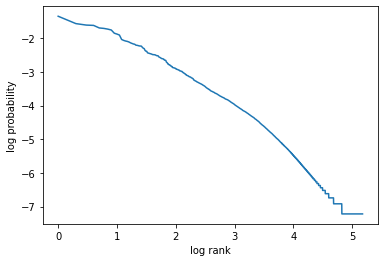

In [ ]:
#plotting the log probability and log rank using matplotlib
import matplotlib.pyplot as plt
log_probability_y=np.log10(df['probability'].tolist())
log_rank_x=np.log10(df['rank'].tolist())
plt.plot(log_rank_x,log_probability_y)
plt.xlabel('log rank')
plt.ylabel('log probability') 
# function to show the plot
plt.show()